In [15]:
import osmuf as ouf

In [16]:
# dictionary of places of interest for convenience, 
places = {0:{'name':'buenos_aires', 'coordinates':(-34.5798,-58.4422),},
          1:{'name':'kaduna', 'coordinates':(10.53364, 7.37360),},
          2:{'name':'margery_street', 'coordinates':(51.5266,-0.1109),},
          3:{'name':'posadas', 'coordinates':(-27.37577,-55.90059),},
          4:{'name':'welwyn_garden_city', 'coordinates':(51.7938,-0.18645),},
          5:{'name':'hayes_lane', 'coordinates':(51.39425,-0.003),}
         }

# bounding box half-distance in meters
distance=500

In [17]:
place=places[2]

place_name=place['name']
point=place['coordinates']

# 02 - Buildings by block or street

In [18]:
# retrieve the data
study_area = ouf.study_area_from_point(point, distance)
city_blocks = ouf.city_blocks_from_point(point, distance)
buildings = ouf.buildings_from_gdf(city_blocks)
street_graph = ouf.street_graph_from_gdf(city_blocks)
streets = ouf.streets_from_street_graph(street_graph)

In [19]:
# process the data
city_blocks, city_blocks_gross = ouf.gen_city_blocks_gross(street_graph, city_blocks)
buildings = ouf.join_buildings_city_block_id(buildings, city_blocks)
buildings = ouf.join_buildings_street_id(buildings, streets)

## Buildings coloured by block_id

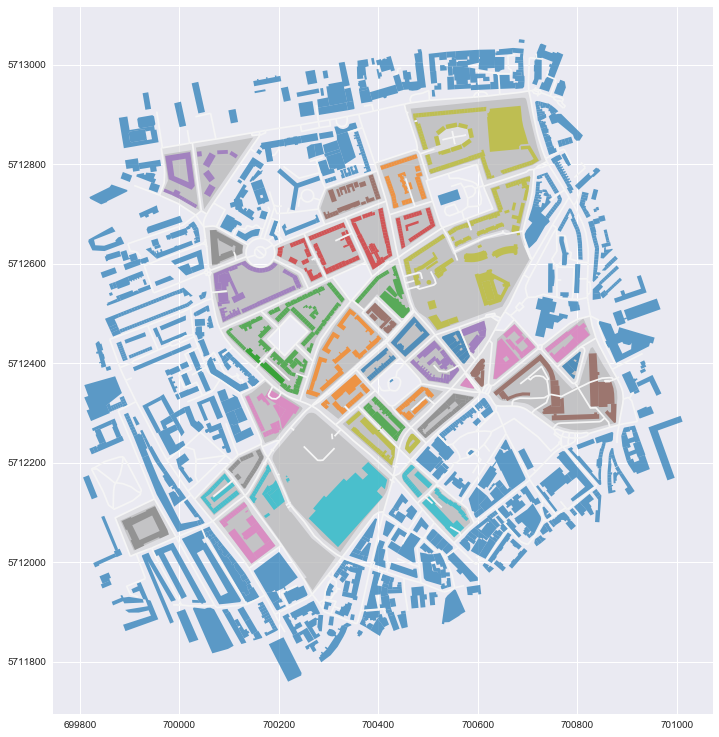

In [20]:
ax = streets.plot(color='whitesmoke', edgecolor='white', figsize=(16,13));

city_blocks_gross.plot(ax=ax, color='lightgray',edgecolor='white', alpha=0.5);

city_blocks.plot(ax=ax, color='darkgray', alpha=0.5);

# show the buildings coloured by block
buildings.plot(ax=ax, column='block_id', cmap=None, categorical=True, legend=False,alpha=0.7);

## Buildings coloured by storeys above ground

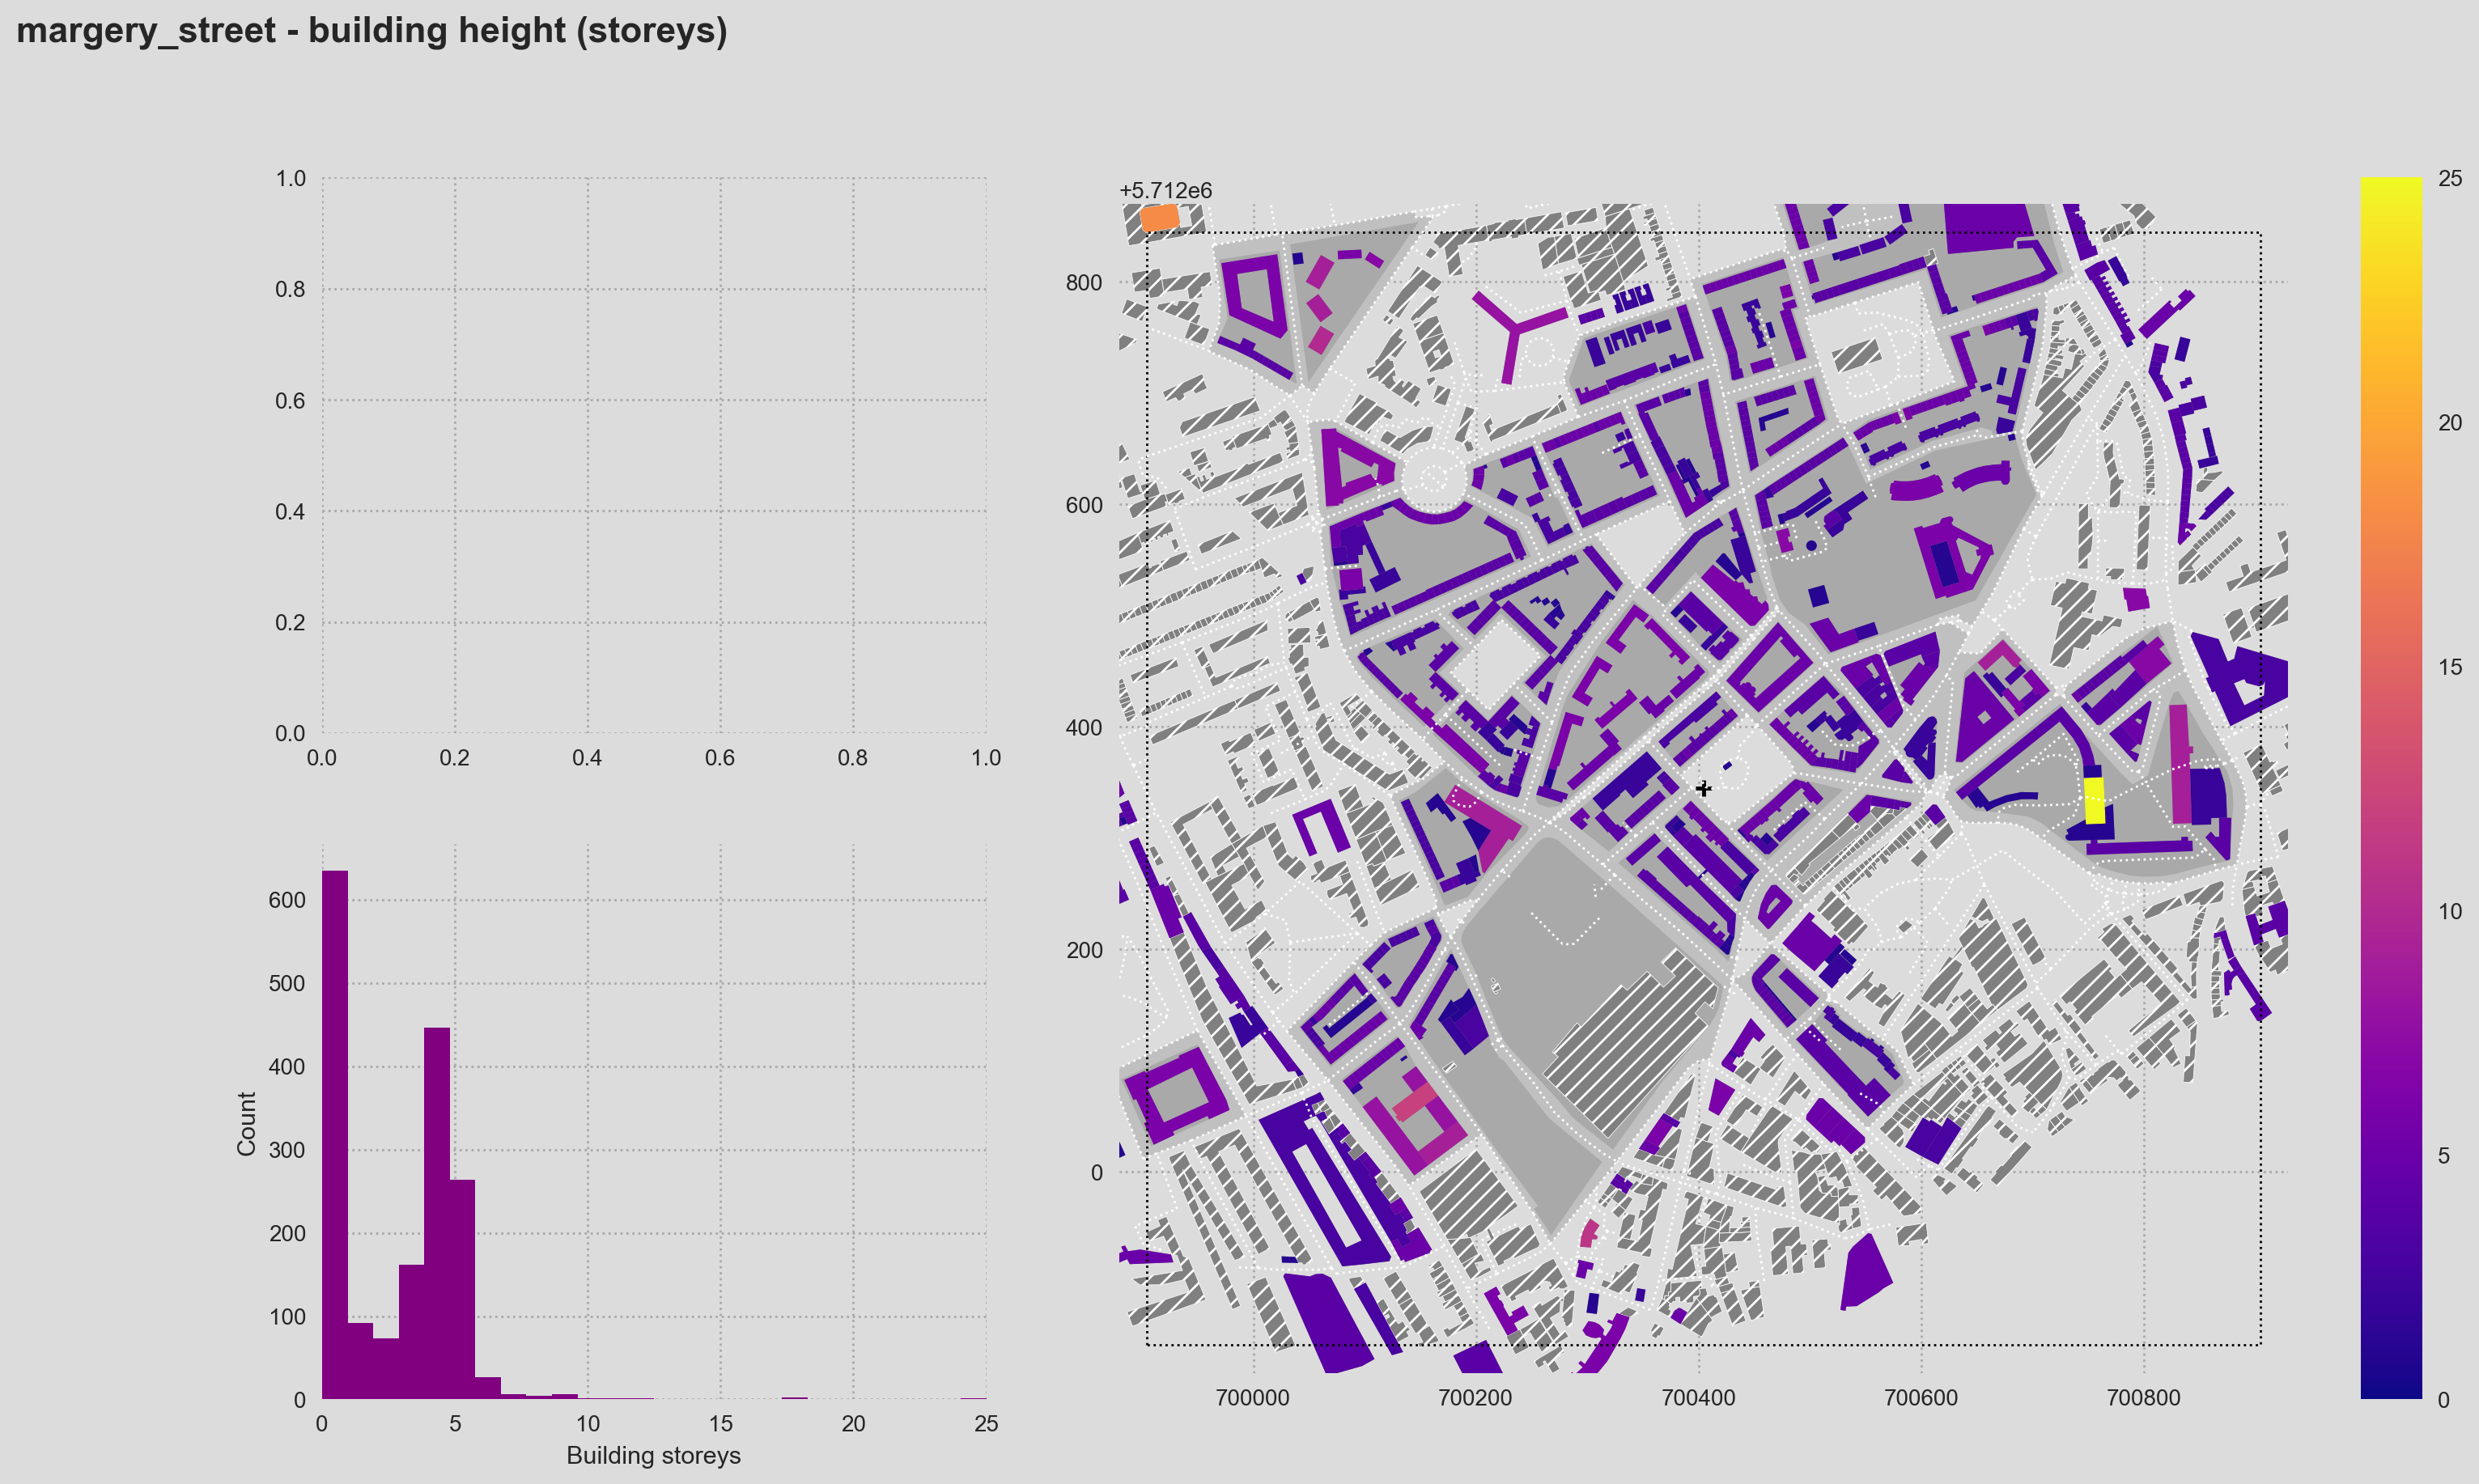

In [21]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - building height (storeys)', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_empty(ax[0])
ouf.ax_building_height_distribution(ax[1], buildings)
ouf.ax_map_building_heights(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/03_building_heights_{}.png'.format(place_name), transparent=False, 
            dpi=200, bbox_inches="tight", facecolor='gainsboro')